# Demand Forecast for e-scooter business.
---

<div class="alert alert-block alert-info">
    This notebook was prepared by <b>Abed AlRahman Naser</b>.<br>
</div>

#### The dataset used in this notebook was taken from: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r

Data Fields
 * ID - A unique ID for each trip. This is an arbitrary sequence and is not derived from any identifier used by the service provider.

__Content of this notebook:__
1. __EDA.__
2. __Feature Engineering.__
3. __Machine Learning models.__
4. __Conclusion.__
  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drive/MyDrive/dirUrl/rows.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# removing null values
df = df.dropna()

In [4]:
df.head(5)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:34 AM,4,5,5,9,4,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,04/18/2020 05:30:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:33 AM,4,5,5,3,3,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,04/18/2020 05:15:00 AM,04/18/2020 05:30:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,1,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,04/18/2020 05:15:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,04/18/2020 05:00:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,9,2020,48453000601,48453000304


## Data Cleaning & Feature Engineering
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10102462 entries, 0 to 10102596
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   Device ID                 object 
 2   Vehicle Type              object 
 3   Trip Duration             int64  
 4   Trip Distance             float64
 5   Start Time                object 
 6   End Time                  object 
 7   Modified Date             object 
 8   Month                     int64  
 9   Hour                      int64  
 10  Day of Week               int64  
 11  Council District (Start)  object 
 12  Council District (End)    object 
 13  Year                      int64  
 14  Census Tract Start        object 
 15  Census Tract End          object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1.3+ GB


In [6]:
df['Council District (Start)'].unique()

array([9, 3, 5, 1, 4, 7, 8, 0, 10, 2, '1', '9', '3', '5', '7', '0', '8',
       '10', '2', '4', 'None', '6', 6], dtype=object)

In [7]:
df['Council District (End)'].unique()

array([4, 3, 1, 5, 9, 8, 2, 7, 10, 0, 6, '9', '1', '3', '5', '0', '8',
       '4', '10', '7', '2', 'None', '6'], dtype=object)

After searching about Austin Texas districts, I found out that there are 10 districts ranged from 1 to 10 which means that 0's are missing values in addition to None.
Source: https://www.austintexas.gov/GIS/CouncilDistrictMap/

In [8]:
# removing missing values fron Counsil District columns
df=df[((df['Council District (Start)']=='0')==False)&((df['Council District (Start)']==0)==False)&((df['Council District (Start)']=='None')==False)&((df['Council District (End)']=='0')==False)&((df['Council District (End)']==0)==False)&((df['Council District (End)']=='None')==False)]

In [9]:
df['Council District (Start)'].unique()

array([9, 3, 5, 1, 4, 7, 8, 10, 2, '1', '9', '3', '5', '7', '8', '10',
       '2', '4', '6', 6], dtype=object)

In [10]:
df['Council District (End)'].unique()

array([4, 3, 1, 5, 9, 8, 2, 7, 10, 6, '9', '1', '3', '5', '8', '4', '10',
       '7', '2', '6'], dtype=object)

In [11]:
#removing non scooters
df=df[df['Vehicle Type']=="scooter"]

In [12]:
# dropping the scooter column
df=df.drop(columns=['Vehicle Type'])

In [13]:
df.head(1)

,ID,Device ID,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,2133,12794.0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:34 AM,4,5,5,9,4,2020,48453001100,48453001806


In [14]:
len(df['Device ID'].unique())

90596

In [15]:
df.columns

Index(['ID', 'Device ID', 'Trip Duration', 'Trip Distance', 'Start Time',
       'End Time', 'Modified Date', 'Month', 'Hour', 'Day of Week',
       'Council District (Start)', 'Council District (End)', 'Year',
       'Census Tract Start', 'Census Tract End'],
      dtype='object')

In [16]:
df=df.drop(columns=['ID', 'Device ID', 'Trip Duration', 'Trip Distance', 'Modified Date', 'Year',
       'Census Tract Start', 'Census Tract End'])

In [17]:
df

,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End)
0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,4,5,5,9,4
1,04/18/2020 05:30:00 AM,04/18/2020 05:45:00 AM,4,5,5,3,3
2,04/18/2020 05:15:00 AM,04/18/2020 05:30:00 AM,4,5,5,9,1
3,04/18/2020 05:15:00 AM,04/18/2020 05:15:00 AM,4,5,5,5,5
4,04/18/2020 05:00:00 AM,04/18/2020 05:15:00 AM,4,5,5,9,9
...,...,...,...,...,...,...,...
10102592,12/09/2020 12:45:00 AM,12/09/2020 01:00:00 AM,12,1,2,9,9
10102593,12/09/2020 01:00:00 AM,12/09/2020 01:00:00 AM,12,1,2,9,9
10102594,12/09/2020 01:00:00 AM,12/09/2020 01:00:00 AM,12,1,2,9,9
10102595,12/09/2020 01:00:00 AM,12/09/2020 01:00:00 AM,12,1,2,9,9


In [18]:
len(df['Hour'].unique())

24

In [19]:
df=df.drop(columns=['End Time','Day of Week','Council District (End)'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9494602 entries, 0 to 10102596
Data columns (total 4 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Start Time                object
 1   Month                     int64 
 2   Hour                      int64 
 3   Council District (Start)  object
dtypes: int64(2), object(2)
memory usage: 362.2+ MB


In [21]:
df['Council District (Start)']=df['Council District (Start)'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9494602 entries, 0 to 10102596
Data columns (total 4 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Start Time                object
 1   Month                     int64 
 2   Hour                      int64 
 3   Council District (Start)  int64 
dtypes: int64(3), object(1)
memory usage: 362.2+ MB


In [23]:
df

,Start Time,Month,Hour,Council District (Start)
0,04/18/2020 05:15:00 AM,4,5,9
1,04/18/2020 05:30:00 AM,4,5,3
2,04/18/2020 05:15:00 AM,4,5,9
3,04/18/2020 05:15:00 AM,4,5,5
4,04/18/2020 05:00:00 AM,4,5,9
...,...,...,...,...
10102592,12/09/2020 12:45:00 AM,12,1,9
10102593,12/09/2020 01:00:00 AM,12,1,9
10102594,12/09/2020 01:00:00 AM,12,1,9
10102595,12/09/2020 01:00:00 AM,12,1,9


In [24]:
df['Start Time']=pd.to_datetime(df['Start Time'], format='%m/%d/%Y %I:%M:%S %p')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9494602 entries, 0 to 10102596
Data columns (total 4 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Start Time                datetime64[ns]
 1   Month                     int64         
 2   Hour                      int64         
 3   Council District (Start)  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 362.2 MB


In [26]:
df['day']=df['Start Time'].dt.day
df['month']=df['Start Time'].dt.month
df['hour']=df['Start Time'].dt.hour
df['year']=df['Start Time'].dt.year
df['day_of_week']=df['Start Time'].dt.day_name()
df=df.drop(columns=['Month','Hour'])

In [27]:
df

,Start Time,Council District (Start),day,month,hour,year,day_of_week
0,2020-04-18 05:15:00,9,18,4,5,2020,Saturday
1,2020-04-18 05:30:00,3,18,4,5,2020,Saturday
2,2020-04-18 05:15:00,9,18,4,5,2020,Saturday
3,2020-04-18 05:15:00,5,18,4,5,2020,Saturday
4,2020-04-18 05:00:00,9,18,4,5,2020,Saturday
...,...,...,...,...,...,...,...
10102592,2020-12-09 00:45:00,9,9,12,0,2020,Wednesday
10102593,2020-12-09 01:00:00,9,9,12,1,2020,Wednesday
10102594,2020-12-09 01:00:00,9,9,12,1,2020,Wednesday
10102595,2020-12-09 01:00:00,9,9,12,1,2020,Wednesday


In [28]:
g_df2=df.groupby(['Council District (Start)', 'hour', 'day', 'month', 'year', 'day_of_week', ]).count().reset_index().rename(columns={'Start Time':'count'}).groupby(['Council District (Start)','hour','month','year','day_of_week']).mean().reset_index().rename(columns={'count':'average demand'}).drop(columns=['day'])
g_df2['average demand']=g_df2['average demand'].astype(int)
g_df2[g_df2['Council District (Start)']==9]

,Council District (Start),hour,month,year,day_of_week,average demand
28201,9,0,1,2019,Friday,118
28202,9,0,1,2019,Monday,106
28203,9,0,1,2019,Saturday,236
28204,9,0,1,2019,Sunday,209
28205,9,0,1,2019,Thursday,95
...,...,...,...,...,...,...
33678,9,23,12,2020,Saturday,360
33679,9,23,12,2020,Sunday,234
33680,9,23,12,2020,Thursday,151
33681,9,23,12,2020,Tuesday,168


In [29]:
g_df2

,Council District (Start),hour,month,year,day_of_week,average demand
0,1,0,1,2019,Friday,4
1,1,0,1,2019,Monday,2
2,1,0,1,2019,Saturday,7
3,1,0,1,2019,Sunday,6
4,1,0,1,2019,Thursday,3
...,...,...,...,...,...,...
37336,10,23,12,2020,Saturday,3
37337,10,23,12,2020,Sunday,1
37338,10,23,12,2020,Thursday,1
37339,10,23,12,2020,Tuesday,2


In [30]:
lol=g_df2.groupby(['Council District (Start)','hour','month','year','day_of_week']).mean().reset_index()
lol[lol['Council District (Start)']==9]

,Council District (Start),hour,month,year,day_of_week,average demand
28201,9,0,1,2019,Friday,118
28202,9,0,1,2019,Monday,106
28203,9,0,1,2019,Saturday,236
28204,9,0,1,2019,Sunday,209
28205,9,0,1,2019,Thursday,95
...,...,...,...,...,...,...
33678,9,23,12,2020,Saturday,360
33679,9,23,12,2020,Sunday,234
33680,9,23,12,2020,Thursday,151
33681,9,23,12,2020,Tuesday,168


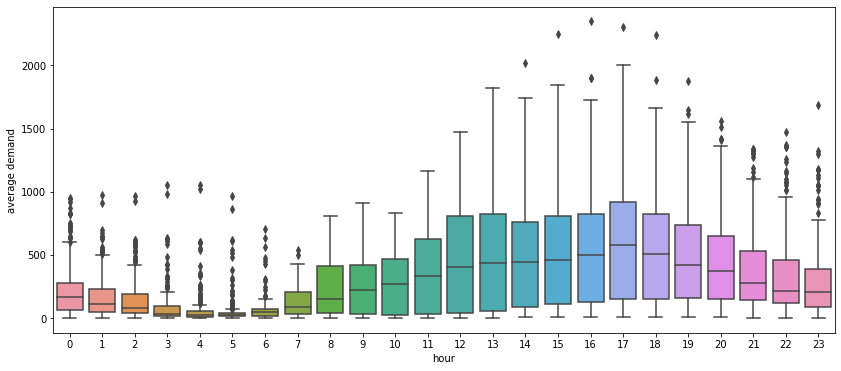

In [34]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
fig.set_size_inches(14, 6)
sns.boxplot(x='hour',y='average demand', data=g_df2[g_df2['Council District (Start)']==9])

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='day_of_week',y='Start Time', data=g_df2[g_df2['Council District (Start)']==1])

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='day_of_week',y='Start Time', data=g_df2[g_df2['Council District (Start)']==9])

In [ ]:
len(df[(df['Council District (Start)']==9)&(df['day']==1)&(df['month']==1)&(df['year']==2019)&(df['day_of_week']=='Tuesday')])

In [42]:
eng_data = pd.get_dummies(g_df2, columns=['Council District (Start)', 'hour', 'month','day_of_week'])

In [44]:
Y=eng_data['average demand']
eng_data=eng_data.drop(columns=['average demand'])
eng_data

,year,Council District (Start)_1,Council District (Start)_2,Council District (Start)_3,Council District (Start)_4,Council District (Start)_5,Council District (Start)_6,Council District (Start)_7,Council District (Start)_8,Council District (Start)_9,Council District (Start)_10,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2019,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2019,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2019,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2019,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37336,2020,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
37337,2020,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
37338,2020,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
37339,2020,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from pprint import pprint
# there are default values for the hyper parameters for the GBR model
gbt = GradientBoostingRegressor(random_state = 42)
pprint(gbt.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [50]:
## Define the Grid for GBT

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]
# Method of selecting samples for training each tree
learning_rate = [0.01, 0.1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [0.01, 0.1],
 'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100, 200, 300, 400, 500]}


In [51]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
gbt_random = RandomizedSearchCV(estimator = gbt, # the base model
                               param_distributions = random_grid, # grid of hyper parameters
                               n_iter = 10, # number of combinations of random hyper parameters to choose
                               cv = 3,# # 3-fold
                               verbose=2,  # print some logs while evaluating the different combinations
                               random_state=42,
                               n_jobs = 1) # use all cores in the machine to train (parallel)


In [52]:
X_train, X_test, y_train, y_test = \
    train_test_split(eng_data,
                     Y,
                     test_size=0.2,
                     random_state=42)

In [53]:
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 5)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 10)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 15)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 20)
GradientBoostingRegressor(n_estimators = 100, min_samples_split= 10)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
gbt_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=  46.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=  46.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=  46.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=  25.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=  25.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=  25.1s
[CV] n_estimators=200, min_samples_split=10

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [55]:
best_gbt_model = gbt_random.best_estimator_
best_gbt_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=51, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=7, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
gbt_random.best_params_

{'learning_rate': 0.01,
 'max_depth': 51,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 500}

In [57]:
gbt_random.best_score_

0.9221449046410758

In [58]:
# r^2
best_gbt_model.score(X_test, y_test)

0.9420062828479409

In [59]:
import xgboost as xgb

In [63]:
len(best_gbt_model.feature_importances_)

54

In [78]:
# Most important features
pd.DataFrame({"features":eng_data.columns,"importance":best_gbt_model.feature_importances_}).sort_values(by="importance",ascending=False).head(10)

,features,importance
9,Council District (Start)_9,0.391728
0,year,0.133095
37,month_3,0.029059
28,hour_17,0.026524
49,day_of_week_Saturday,0.025254
46,month_12,0.018635
17,hour_6,0.016822
14,hour_3,0.016801
15,hour_4,0.016546
16,hour_5,0.016022
